<a href="https://colab.research.google.com/github/AbuNuurah/Ede-indigenous-man/blob/master/COVID19_VarBudari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COVID_19 Case In Korea.
FORECASTING

# VAR(p) processes
We are interested in modeling a T×K multivariate time series Y, where T denotes the number of observations and K the number of variables. One way of estimating relationships between the time series and their lagged values is the vector autoregression process:




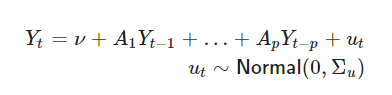

where Ai is a K×K coefficient matrix.

# Model fitting

To estimate a VAR model, one must first create the model using an ndarray of homogeneous or structured dtype. When using a structured or record array, the class will use the passed variable names. Otherwise they can be passed explicitly:

In [0]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Import Statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

import warnings
warnings.filterwarnings("ignore")

import plotly.offline as pyoff
import plotly.graph_objs as go

# Import the datasets

In [0]:
mdata = pd.read_csv("COVID19_11.csv", header=0)
 
df = pd.DataFrame(mdata, columns= ['Cases','Dealth'])

print(mdata)
df.shape

      Date  Cases  Dealth
0   01-Mar    586       4
1   02-Mar    599       7
2   03-Mar    851       4
3   04-Mar    435       3
4   05-Mar    663       7
5   06-Mar    309       1
6   07-Mar    448       5
7   08-Mar    272       2
8   09-Mar    165       3
9   10-Mar     35       7
10  11-Mar    242       0
11  12-Mar    114       6
12  13-Mar    110       1
13  14-Mar    167       5
14  15-Mar     76       3
15  16-Mar     74       0
16  17-Mar     84       6
17  18-Mar     93       3
18  19-Mar    157       7
19  20-Mar     87       3
20  21-Mar    147       8
21  22-Mar     78       2
22  23-Mar     64       7
23  24-Mar     76       9
24  25-Mar    100       6
25  26-Mar    104       5
26  27-Mar     91       8
27  28-Mar    146       5
28  29-Mar    105       8
29  30-Mar     78       6
30  31-Mar    125       4
31  01-Apr    101       3
32  02-Apr     89       4
33  03-Apr     86       5
34  04-Apr     94       3
35  05-Apr     81       6
36  06-Apr     47       3
37  07-Apr  

(42, 2)

The VAR class assumes that the passed time series are stationary. Non-stationary or trending data can often be transformed to be stationary by first-differencing or some other method. For direct analysis of non-stationary time series, a standard stable VAR(p) model is not appropriate.

Visualize the Time Series

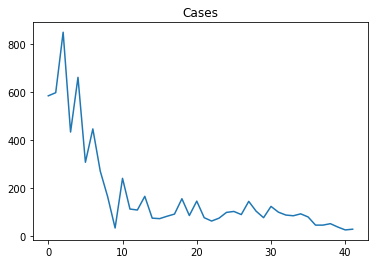

In [0]:
mdata['Cases'].plot(title = 'Cases')

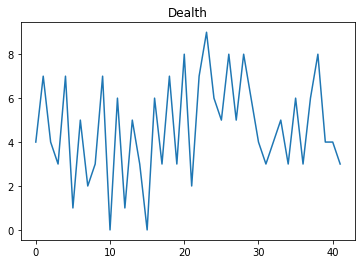

In [0]:
mdata['Dealth'].plot(title = 'Dealth')

In [0]:
#plot Daily Cases
plot_data = [
    go.Scatter(
        x=mdata['Date'],
        y=mdata['Cases'],
    )
]
plot_layout = go.Layout(
        title='Daily Cases'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [0]:
#plot Daily Dealth
plot_data = [
    go.Scatter(
        x=mdata['Date'],
        y=mdata['Dealth'],
    )
]
plot_layout = go.Layout(
        title='Daily Dealth'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [0]:
from statsmodels.tsa.base.datetools import dates_from_str

mdata = mdata[['Cases', 'Dealth']]


data = np.log(mdata).diff().dropna()

# make a VAR model
model = VAR(mdata)

In [0]:
results = model.fit(1)

results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 14, Apr, 2020
Time:                     07:10:29
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    11.4820
Nobs:                     41.0000    HQIC:                   11.3226
Log likelihood:          -340.593    FPE:                    75490.9
AIC:                      11.2312    Det(Omega_mle):         65547.6
--------------------------------------------------------------------
Results for equation Cases
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            32.929545        44.512587            0.740           0.459
L1.Cases          0.751288         0.093728            8.016           0.000
L1.Dealth        -0.415289         7.845202           -0.053           0.958

the log-likelihood is almost always negative. The only real interpretation for log-likelihood is, higher is better. 

The basic principles that guide the use of the AIC is lower indicates a more parsimonious model, 

Lower BIC value indicates lower penalty terms hence a better model.

Though BIC is always higher than AIC, lower the value of these two measures, better the model.

The coefficients describe the mathematical relationship between each independent variable and the dependent variable. The p-values for the coefficients indicate whether these relationships are statistically significant.

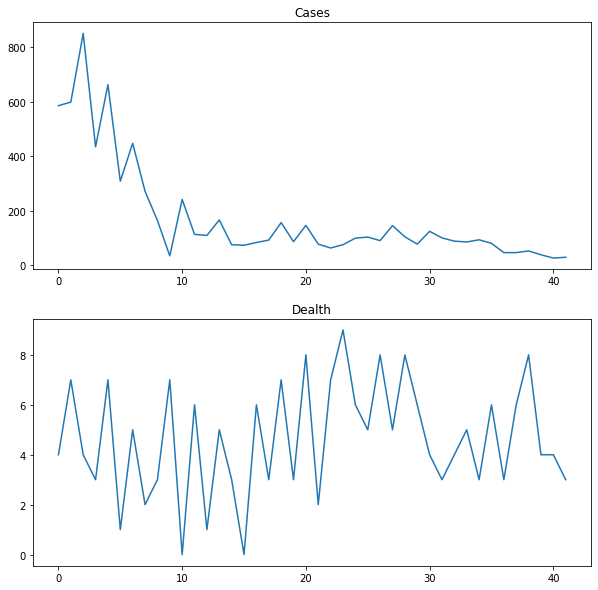

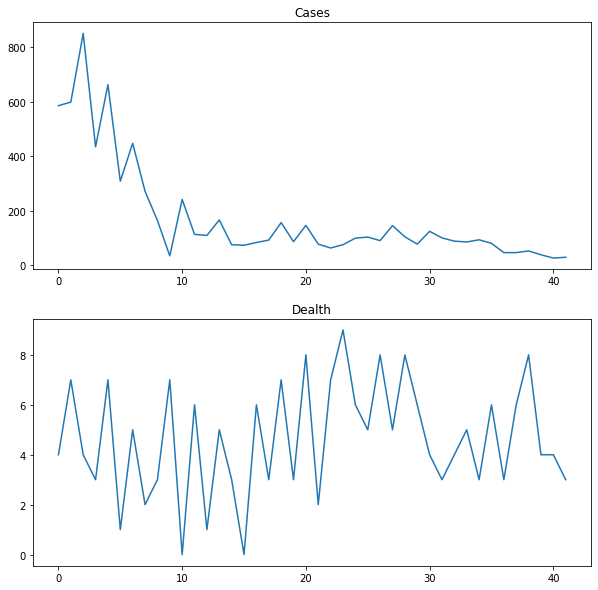

In [0]:
results.plot()

### Lag order selection¶
Choice of lag order can be a difficult problem. Standard analysis employs likelihood test or information criteria-based order selection. We have implemented the latter, accessible through the VAR class:

In [0]:
model.select_order(10)

When calling the fit function, one can pass a maximum number of lags and the order criterion to use for order selection:

In [0]:
results = model.fit(maxlags=10, ic='aic')

# Forecasting
The linear predictor is the optimal h-step ahead forecast in terms of mean-squared error:

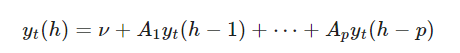

We can use the forecast function to produce this forecast. Note that we have to specify the “initial value” for the forecast:

In [0]:
lag_order = results.k_ar

In [0]:
## forecast 5 periods foreward
results.forecast(data.values[-lag_order:], 5)

array([[21.48380797,  1.05228539],
       [21.50810244,  1.28792539],
       [39.13587064,  2.43993085],
       [37.55828568,  2.19282561],
       [43.95729203,  3.35089799]])

The forecast_interval function will produce the above forecast along with asymptotic standard errors. These can be visualized using the plot_forecast function:

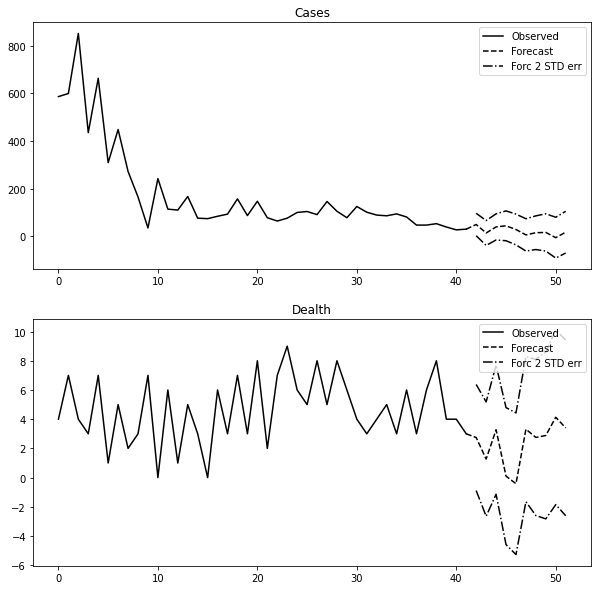

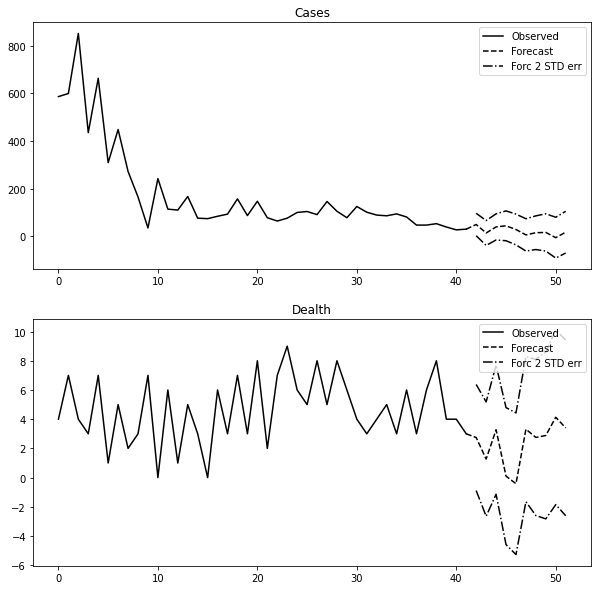

In [0]:
results.plot_forecast(10)